# tracking clouds - show same event with low - high TH

Define clouds, basic tools


### Nov 2020, JAH

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

to_df = pd.DataFrame.from_records

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.hfit         as hfit

import bes.bes           as bes
import bes.clouds        as clouds
import bes.chits         as chits
import bes.display       as nplay
import clouds        as clouds
import pltclouds     as pltclouds

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Fri Dec 18 10:51:14 2020


### load data

In [5]:
def get_chits_filename(run_number, label = 'ds_rough'):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/chits_{label}_{run_number}.h5'
    return filename


In [47]:
run_number = 8182
fname = get_chits_filename(run_number)
print(fname)
dfhits   = pd.read_hdf(fname, 'CHITs.lowTh')
dfhitsHT = pd.read_hdf(fname, 'CHITs.highTh')
events = np.unique(dfhits.event.values)
print('total events ', len(events))

/home/hernando/data/NEW/chits_ds_rough_8182.h5
total events  2760


## Load Event

In [48]:
def select_event(ddh):
    events  = np.unique(ddh.event.values)
    ievent   = np.random.choice(events, 1)[0]
    return ievent

def get_hits_event(ddh, ievent):
    hh = ddh.groupby('event').get_group(ievent)
    return chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E', 'Q', 'time'))    

event number  627992
total energy  1.586 MeV
total light  410224.231 pes
total charge 21086.656 pes
z-width 106.536 mm


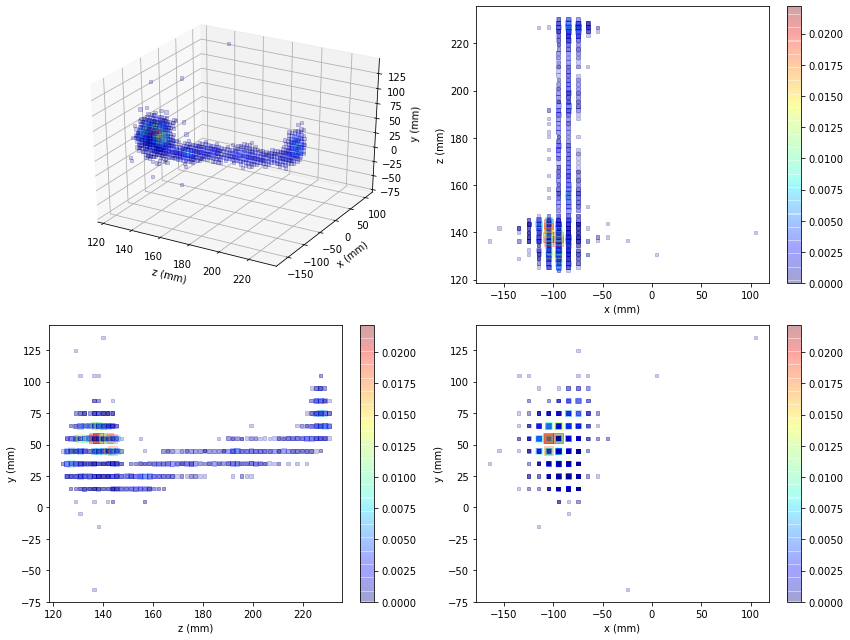

In [67]:
ievent                        = select_event(dfhits)
x, y, z, erec, eraw, q, times = get_hits_event(dfhits, ievent)

print('event number ', ievent)
print('total energy {:6.3f}'.format(np.sum(erec)), 'MeV')
print('total light  {:6.3f}'.format(np.sum(eraw)), 'pes')
print('total charge {:6.3f}'.format(np.sum(q)), 'pes')
dz     = np.max(z) - np.min(z)
print('z-width {:6.3f}'.format(dz), 'mm')

nplay.event(x, y, z, erec, alpha = 0.2, cmap = 'jet')

event number  627992
total energy  1.586 MeV
total light  410224.231 pes
total charge 12849.343 pes
z-width 104.966 mm


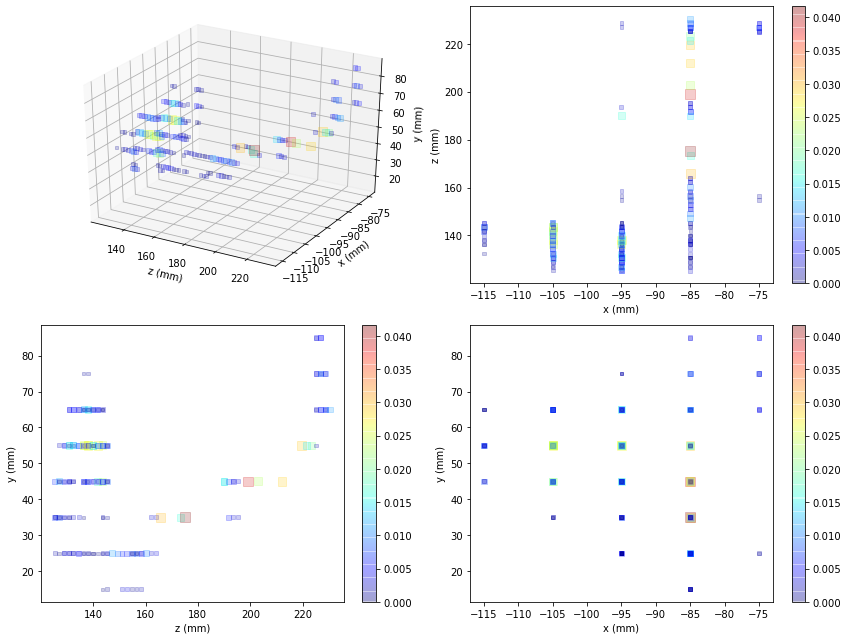

In [68]:
x, y, z, erec, eraw, q, times = get_hits_event(dfhitsHT, ievent)

print('event number ', ievent)
print('total energy {:6.3f}'.format(np.sum(erec)), 'MeV')
print('total light  {:6.3f}'.format(np.sum(eraw)), 'pes')
print('total charge {:6.3f}'.format(np.sum(q)), 'pes')
dz     = np.max(z) - np.min(z)
print('z-width {:6.3f}'.format(dz), 'mm')

nplay.event(x, y, z, erec, alpha = 0.2, cmap = 'jet')

**Conclusions: **
    
    * Event 2445463 in run 8182 shows that HT hits split the track along z.
    
    * Event 2192859 in run 8182 shows good agreement between LT and HT hits
    
    * Event 748405 in run 8182 is split in HT, maybe by clouds... or by HT
    
    * Event 720448 in run 8182 split also in HT

## Load the event

In [69]:
#event = 543247
x, y, z, erec, eraw, q, times = get_hits_event(dfhits, ievent)
xstep, ystep, zstep = 10., 10., 2.

## Run and Draw clouds

In [70]:
ndim    = 3
coors   = (x, y, z)
steps   = (xstep, ystep, zstep)
weights = eraw

dfclouds = clouds.clouds(coors, steps, weights)
#dfclouds

{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': False, 'rangers': True}


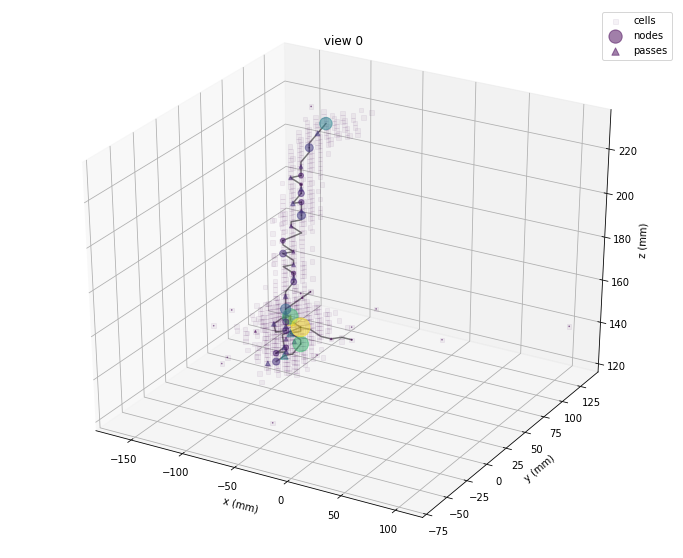

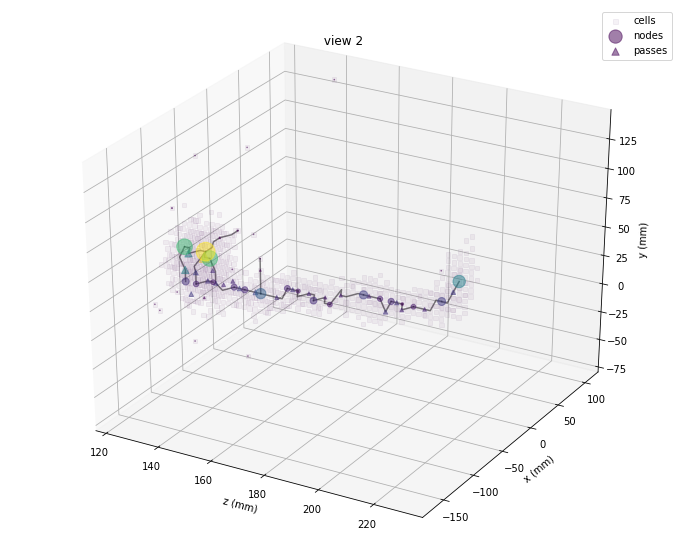

In [71]:
draw, plots = pltclouds.get_draw_clouds(dfclouds)
print(plots)
plots['passes'] = True
for view in [0, 2]: draw(plots, scale = 0.004, xaxis = view)

## Same for HT hits

In [72]:
x, y, z, erec, eraw, q, times = get_hits_event(dfhitsHT, ievent)

coors   = (x, y, z)
steps   = (xstep, ystep, zstep)
weights = eraw

dfclouds = clouds.clouds(coors, steps, weights)

{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': False, 'rangers': True}


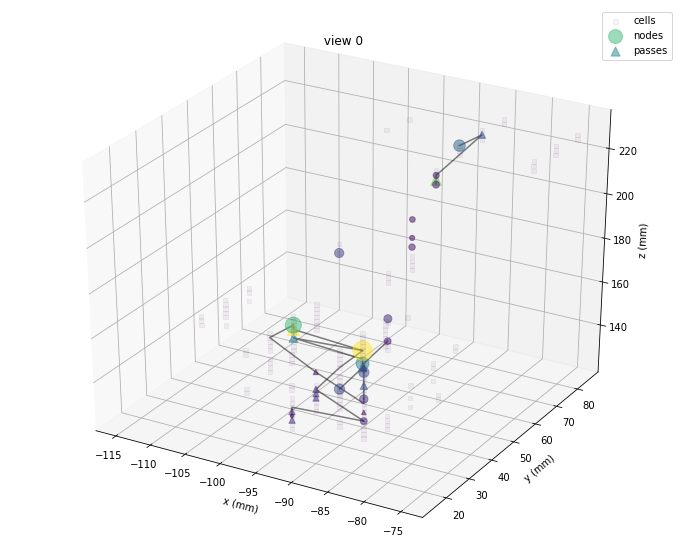

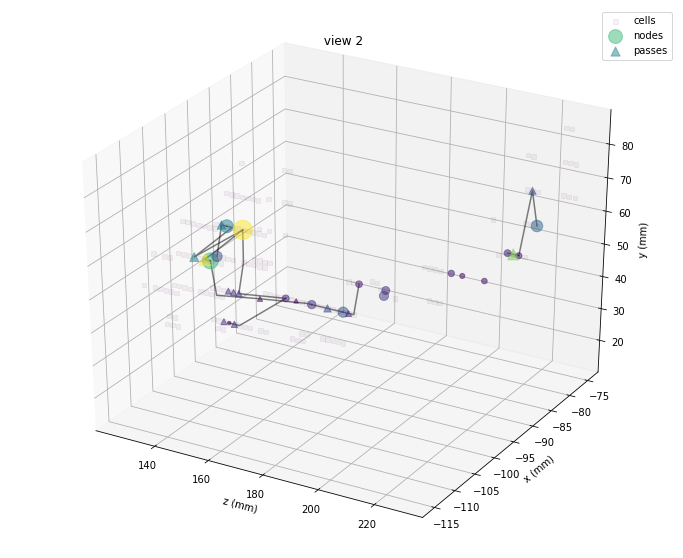

In [73]:
draw, plots = pltclouds.get_draw_clouds(dfclouds)
print(plots)
plots['passes'] = True
for view in [0, 2]: draw(plots, scale = 0.004, xaxis = view)